In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.colors import LightSource

In [2]:
def compare(z, cmap, ve=1):
    # create subplots and hide ticks
    fig, axs = plt.subplots(ncols=2, nrows=2)
    for ax in axs.flat:
        ax.set(xticks=[], yticks=[])
    
    # illuminate the scene from the northwest
    ls = LightSource(azdeg=315, altdeg=45)
    
    axs[0, 0].imshow(z, cmap=cmap)
    axs[0, 0].set(xlabel="Colormapped Data")
    
    axs[0, 1].imshow(ls.hillshade(z, vert_exag=ve), cmap="gray")
    axs[0, 1].set(xlabel="Illumination Intensity")
    
    rgb = ls.shade(z, cmap=cmap, vert_exag=ve, blend_mode="hsv")
    axs[1, 0].imshow(rgb)
    axs[1, 0].set(xlabel="Blend Mode: 'hsv' (default)")
    
    rgb = ls.shade(z, cmap=cmap, vert_exag=ve, blend_mode="overlay")
    axs[1, 1].imshow(rgb)
    axs[1, 1].set(xlabel="Blend Mode: 'overlay'")
    
    return fig

In [3]:
def plotter():
    # test data
    x, y = np.mgrid[-5:5:0.05, -5:5:0.05]
    z = 5 * (np.sqrt(x ** 2 + y ** 2) + np.sin(x ** 2 + y ** 2))
    
    dem = cbook.get_sample_data("jacksboro_fault_dem.npz", np_load=True)
    elev = dem["elevation"]
    
    fig = compare(z, plt.cm.copper)
    fig.suptitle("HSV Blending Looks Best with Smooth Surfaces", y=0.95)
    
    fig = compare(elev, plt.cm.gist_earth, ve=0.05)
    fig.suptitle("Overlay Blending Looks Best with Rough Surfaces", y=0.95)
    
    plt.show()

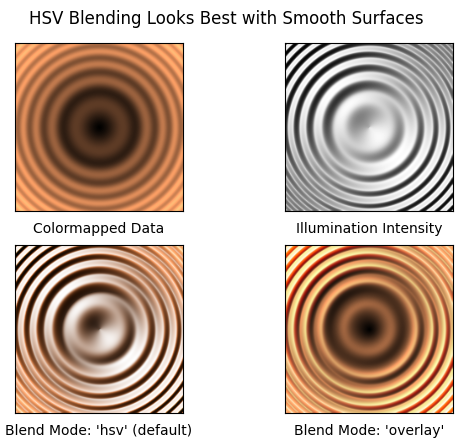

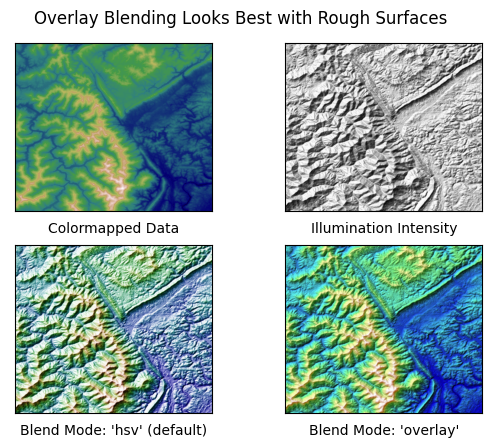

In [4]:
if __name__ == "__main__":
    plotter()